In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv('../data/JM1.csv')
df['defects'] = df['defects'].astype(int)

X = df.drop('defects', axis=1)
y = df['defects']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)
# LR-modell
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)

y_pred = model_lr.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# RF-modell
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)




print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


# RF- modell med klassviktning
rf_weighted = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_weighted.fit(X_train, y_train)
y_pred_weighted = rf_weighted.predict(X_test)


print(confusion_matrix(y_test, y_pred_weighted))
print("\nClassification Report:\n", classification_report(y_test, y_pred_weighted))


=== Logistic Regression ===
[[2184   36]
 [ 381   40]]
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2220
           1       0.53      0.10      0.16       421

    accuracy                           0.84      2641
   macro avg       0.69      0.54      0.54      2641
weighted avg       0.80      0.84      0.79      2641



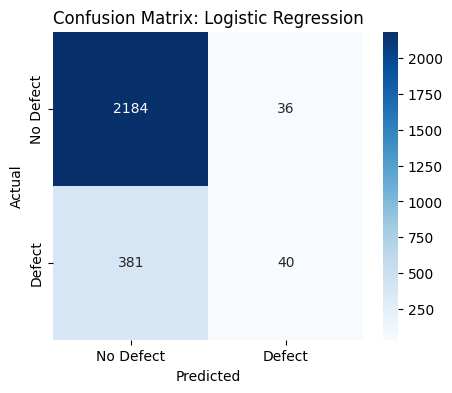

=== Random Forest ===
[[2166   54]
 [ 337   84]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2220
           1       0.61      0.20      0.30       421

    accuracy                           0.85      2641
   macro avg       0.74      0.59      0.61      2641
weighted avg       0.82      0.85      0.82      2641



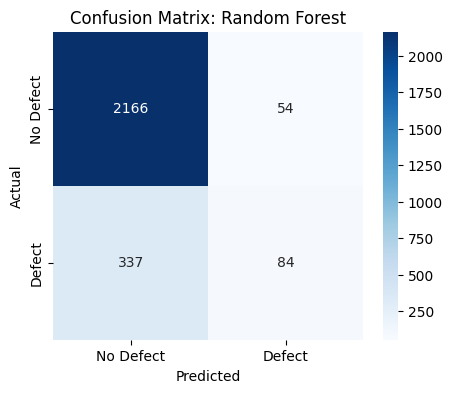

=== Random Forest (class_weight=balanced) ===
[[2151   69]
 [ 339   82]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      2220
           1       0.54      0.19      0.29       421

    accuracy                           0.85      2641
   macro avg       0.70      0.58      0.60      2641
weighted avg       0.81      0.85      0.81      2641



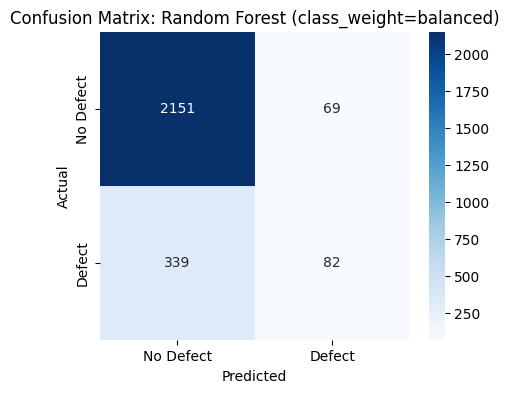

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# === Steg 1: Läs in och förbered data ===
df = pd.read_csv('../data/JM1.csv')
df['defects'] = df['defects'].astype(int)

X = df.drop('defects', axis=1)
y = df['defects']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# === Modellfunktion ===
def train_and_evaluate(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"=== {model_name} ===")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    # Visualisera confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Defect", "Defect"], yticklabels=["No Defect", "Defect"])
    plt.title(f'Confusion Matrix: {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# === Träna modeller ===
lr = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(random_state=42)
rf_bal = RandomForestClassifier(random_state=42, class_weight='balanced')

train_and_evaluate(lr, "Logistic Regression")
train_and_evaluate(rf, "Random Forest")
train_and_evaluate(rf_bal, "Random Forest (class_weight=balanced)")
